<a href="https://colab.research.google.com/github/Ruphai/UBS/blob/main/Bias_Variance_RufaiBalogun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goodness of a fit 
==========
This notebook illustrates different aspects of the goodness of a fit (bias-variance tradeoff, and over or under-fitting) by using [the polynomial regression](https://en.wikipedia.org/wiki/Polynomial_regression) in the context of one explanatory variable. We briefly describe hereafter the theory of the polynomial regresion.

**Polynomial regression**
----------
We are looking at explaining or predicting $y$ from only one explanatory variable $x$. For example, a quadratic regression model estimates $y$ by using the following  function $f$:
  $$y\approx f(x)=a_0\times 1 + a_1\times x + a_2\times x^2$$
where $(a,b,c)$ are the trainable parameters. The function $f$ is thus a linear combination of the following basic functions of $x$: $(1,x,x^2)$.  

## Workspace utilities

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My\ Drive/UBS/ML4EO

/content/drive/My Drive/UBS/ML4EO


## Polynomial regression
The Figure below displays curves for different values of $(a,b,c)$ parameters.

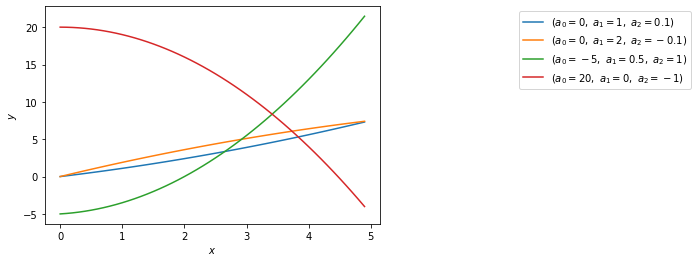

In [ ]:
%matplotlib inline
import matplotlib.pyplot as pl
import numpy

# Generate points between (0,5)
x = numpy.arange(0., 5., 0.1)

def makelabel(a,b,c):
    return r'$(a_0=' + str(a0) + ',\ a_1=' + str(a1) + ',\ a_2=' + str(a2) + ')$'

# Curves for different value parameters
[a0,a1,a2]  = [0,1,0.1]
pl.plot(x, a0 + a1*x + a2*x**2, label=makelabel(a0,a1,a2))
[a0,a1,a2]  = [0,2,-0.1]
pl.plot(x, a0 + a1*x + a2*x**2, label=makelabel(a0,a1,a2))
[a0,a1,a2]  = [-5,0.5,1]
pl.plot(x, a0 + a1*x + a2*x**2, label=makelabel(a0,a1,a2))
[a0,a1,a2]  = [20,0,-1]
pl.plot(x, a0 + a1*x + a2*x**2, label=makelabel(a0,a1,a2))
pl.legend(bbox_to_anchor=(1.4, 1.0))
pl.ylabel(r'$y$')
pl.xlabel(r'$x$')
pl.show()

In the case of a polynomial regression of degree $n$ (also named *order*), we search for $n+1$ coefficients such as
$$y\approx f(x) = a_0 + a_1x + a_2x^2 + \cdots a_nx_n = \sum_{i=0}^n a_ix^i $$

# Construction of a synthetic dataset
We construct here a synthetic dataset for which we know the function that allows us to generate new data. The advantage of synthetic dataset is to control the different setting such as the number of (training and testing) examples, and the degree of the polynomial functions.

## Setting
The dataset has several characteristics including the number of observations, the function $f$ to generate new data, the level of noise, or the minimum and maximum values for the display.

The values of $x$ are selected at random in the following ranges for a given number of examples:
+ *rd.xmin* : minimum for $x$ from the "regressiondemo.py" library, set to 0
+ *rd.xmax* : maximum for $x$ from the "regressiondemo.py" library, set to 10
+ *m* : number of points/observations, defined locally in the notebook

The values of $y$ depends on the "true" function $f$ and the level of noise:
+ *truefunc()* : the "true" function $f$ that generates the data, defined locally in the notebook
+ *sigma* : the standard-deviation of the noise, defined locally in the notebook

For the display, $y$ values are restrained to 
+ *ydisplaymin* : minimum of $y$, defined locally in the notebook
+ *ydisplaymax* : maximum of $y$, defined locally in the notebook

## Step 1.1: Generation of non-noisy data
First, we generate non-noisy data. Observations follows perfectly the funciton $f$. The function $f$, the number of observations (traning data), and the noise level can be modified in the following cells.

In [ ]:
# import
%matplotlib inline
import matplotlib.pyplot as pl
import sys
import os
#  import refressiondemo
sys.path.append(os.getcwd())
import regressiondemo as rd

In [ ]:
##############################
#      Setting
#=======================
# The true function (f(x))
def truefunc(x):
    return numpy.sin(x*2.0)*numpy.sqrt(x)/3.3

#  for the display
ydisplaymin = -1.8
ydisplaymax = 1.8

#  do not test for m>100 (O(m^3))
m = 60

# generate a vector x (at random)
x = rd.makeX(m)
# true y values
yt = truefunc(x)

# generate xts and yts for the dispaly (strong point density)
xts = rd.makeX(200,uniform=True)
yts = truefunc(xts)

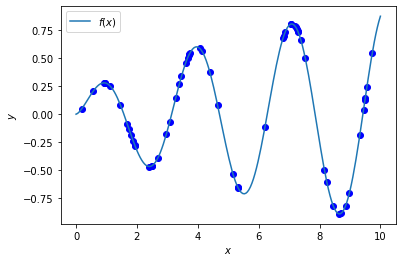

In [ ]:
# Figure
pl.plot(x, yt, 'bo')
pl.plot(xts, yts,label = r'$f(x)$') 
pl.ylabel(r'$y$')
pl.xlabel(r'$x$')
pl.legend()
pl.show()

## Step 1.2:  Adding some noise
To get more real data, a commonly used approach consists in adding some noise to $y$. Here, we add a Gaussian noise (standard deviation *sigma*).
What does represent the figure below?

In [ ]:
#  noise level
rd.setSigma(1)
#  Add Gaussian noise
y = rd.addNoise(yt,laplace=True)

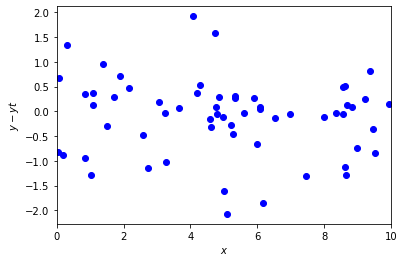

In [ ]:
pl.plot(x, y-yt, 'bo') 
pl.ylabel(r'$y-yt$')
pl.xlabel(r'$x$')
pl.xlim(rd.xmin,rd.xmax)
pl.show()

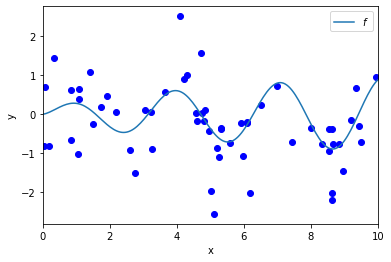

In [ ]:
# Data
pl.plot(x, y, 'bo') 
pl.ylabel('y')
pl.xlabel('x')
pl.xlim(rd.xmin,rd.xmax)
pl.plot(xts, yts,label = r'$f$')
pl.legend()

In the code blocks above, we have generated datasets with a standard deviation of 1 from the mean distribution in the datasets. 

# Polynomial regression
We will use the polynomial regression function of Numpy: *np.polyfit()*.  
This determines the parameter $a_i$ ($1\le i \le n$), where $n$ is the degree of the polynomial function, which minimise the quadratic cost (same cost than for the linear regression):
    $$\sum_{i=1}^m (y_i-f(x_i))^2 $$

Here, we do not have interest in the optimisation algorithm (we could use for example the gradient descent algorithm).

## Step 1.3: polynomial regression
Let us try first a polynomial of order 4.
Please note that the thick blue line is $f$, whereas the green curve (thiner) corresponds to the learned model $\hat{f}$.

In [ ]:
##############################
#      Setting
#      =======================
#     change the *order* value to test for polynoms of different degrees
order = 10
##############################

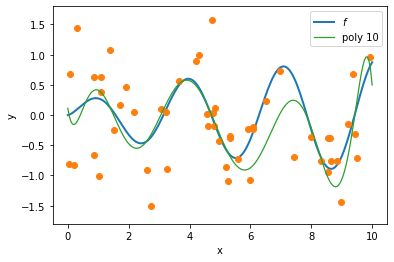

In [ ]:
# plot data and the truth
pl.plot(xts, yts,label = r'$f$', linewidth=2) 
pl.plot(x, y, 'o') 
pl.ylabel('y')
pl.xlabel('x')

#  build the fitted poly curve (xts,ys) from order-th regression
ys = rd.linReg(x,y,xts,order)

#  plot fitted curve
pl.plot(xts, ys,label = 'poly ' + str(order), linewidth=1.25 )  
pl.ylim(ydisplaymin,ydisplaymax)
pl.legend()

The polynomial functions of low degree do not work very well to explain our complex $f$ function.

## Step 1.4: on a mystery function
Here we generate new data. The function *rd.demoReg1()* defines its own function $f$ to generate data.

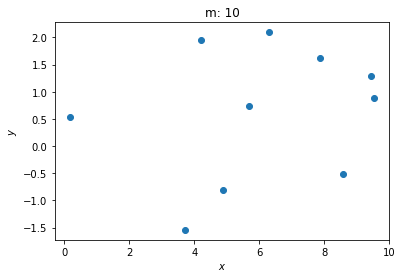

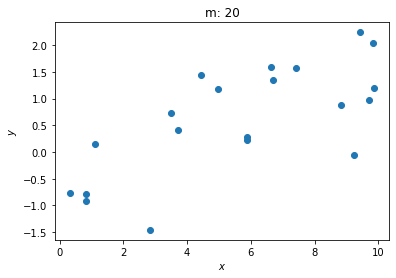

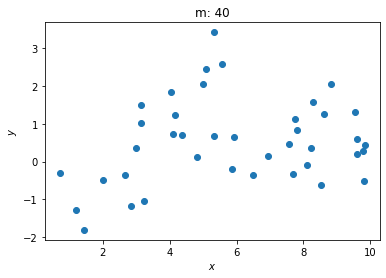

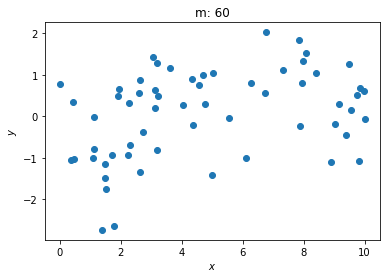

In [ ]:
##############################
#      Setting
#      =======================
#     # observations/points
m_all = [10, 20, 40, 60]

##############################
# plot
for m in m_all:
  pl.figure()
  x,y = rd.demoReg1(m)
  pl.plot(x, y, 'o') 
  pl.ylabel(r'$y$')
  pl.xlabel(r'$x$')
  pl.title('m: ' + str(m))

We will now try different fits

### Examining model outcomes for different parameters
Test for different quantity of training data ($m$) and different polynomial functions (*order*), and different noise. Display the different figures, and **comment** them.

In the following code block, we examine the different outcome when the noise level, model order and data size are adjusted. In this case shown below, the data are tweaked for each of these parameters simultaneously.

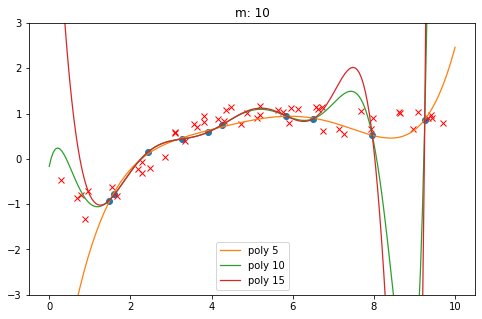

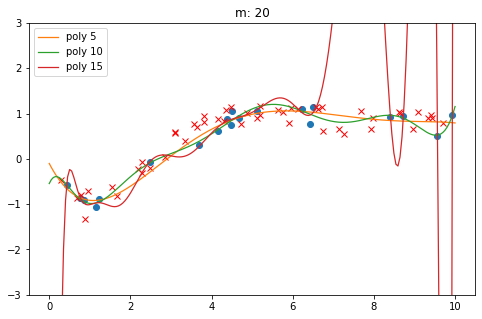

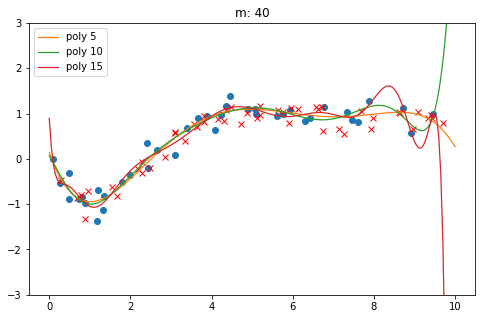

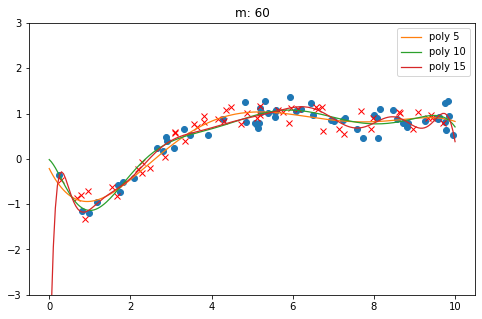

In [ ]:
##############################
#      Setting
#      =======================
#     change the *order* value to test polynomial functions of different degrees
"""
FIRST CASE: Check the model outcome for less noisy data with different quantity
of data and different polynomial order. The graph for this is shown below. Note, 
both the test sets and train sets are drawn from the same data distribution.
"""

ydisplaymin, ydisplaymax = -3.0, 3.0 # set display limits

rd.setSigma(0.2) # noise level in data

order_all = [5, 10, 15] #polynomial order

xtest, ytest = rd.demoReg1(50) # generate randome test data with similar distribution as train data

for m in m_all:
  pl.figure(figsize = (8, 5))
  x,y = rd.demoReg1(m)
  pl.plot(x, y, 'o')
  pl.plot(xtest, ytest, 'rx')

  for o in order_all:
    #  build the fitted poly curve (xts,ys) from order-th regression
    ys = rd.linReg(x,y,xts,o)
    #  plot fitted curve
    pl.plot(xts, ys,label = 'poly ' + str(o), linewidth=1.25 )
    pl.ylim(ydisplaymin,ydisplaymax)
    pl.title("m: " + str(m))
    pl.legend()

Here, we see a case of a less noisy data with an evident distribution in the data. At different data quantity, we can tell that higher polynomial model complexity only increases the dependence of the model on the data -- a classical case of overfitting in Machine learning literature. While lower order polynomial model are too simple to capture the complexity in the data and also generalize to new data (test data shown in red). In both cases of overfitting and underfitting, increasing data did not necessarily improves the fitting of our learned model on the data. 

Overall, we see that a model of polynomial order 10 captured the data distribution well and could generalize well to new datasets from the same distribution while model of order 10 shows the distribution in the data, it appeared too capture the complexity of the data and model of order 10 appears too dependent on this particular training sets. A closer look at the graphical display would show that the model of order 10 manages to capture the distribution in our test data (shown in red) --showing that it generalizes well to new data.

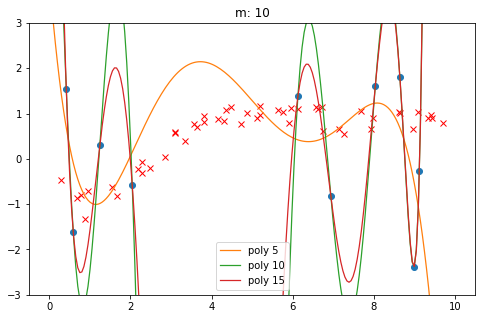

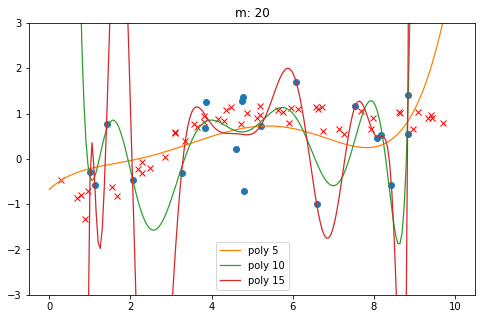

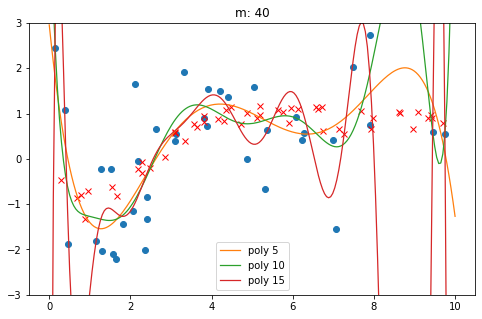

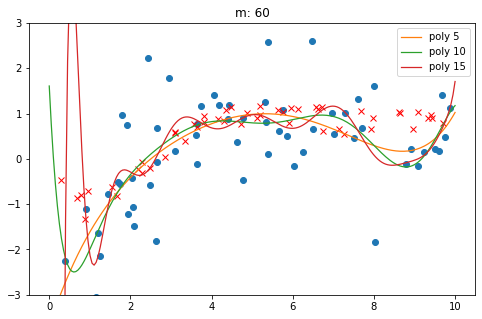

In [ ]:
##############################
#      Setting
#      =======================
#     change the *order* value to test polynomial functions of different degrees
"""
SECOND CASE: Here, the noise level in the data was increased significantly to 
display how the model performs at different model order and quantity of noisy 
data. Note, both the test sets and train sets are drawn from the same data 
distribution.
"""
rd.setSigma(1) # noise level in data

for m in m_all:
  pl.figure(figsize = (8, 5))
  x,y = rd.demoReg1(m)
  pl.plot(x, y, 'o')
  pl.plot(xtest, ytest, 'rx')

  for o in order_all:
    #  build the fitted poly curve (xts,ys) from order-th regression
    ys = rd.linReg(x,y,xts,o)
    #  plot fitted curve
    pl.plot(xts, ys,label = 'poly ' + str(o), linewidth=1.25 )
    pl.ylim(ydisplaymin,ydisplaymax)
    pl.title("m: " + str(m))
    pl.legend()

In this case, we see a possible challenge in developing a well-tuned model for capturing the patterns in our data. In this case, the model underperforms significantly due to the high level of noise in the data. Although higher order model tried to capture all the many variances in the data, it still was unable to capture the whole structure. This alludes to the popular saying of 'garbage in garbage out', meaning a model is as good as its input data.
In cases like this, it might be useful to perform some feature engineering and data filtering to remove outliers and unusual data points, especially if the data distribution is known beforehand.